# Time Independent Schrödinger Equation

$$-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \psi + V \psi = E \psi$$

where, 

$\psi$ is the stationary state wave fuction of a quantum particle, 

$m$ is the mass of the quantum paricle, 

$V = V(x)$ is the potential applied on the quantum particle, and 

$E$ is the energy of the quantum particle.

# Finite difference method
Let us discritize $x$ by slicing it into $n$ evenly spaced points $\{x_j\}$, with $ \Delta x \equiv x_{j+1} - x_j$ and let $\psi_j \equiv \psi(x_j)$ and $V_j \equiv V(x_j)$. $j = 1, 2, 3 \dots n$

Therefore,
$$-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \psi_j + V_j \psi_j = E \psi_j$$

Using finite difference,
$$\frac{d^2}{dx^2} \Psi_j \approx \frac{\Psi_{j-1} - 2 \Psi_{j} + \Psi_{j+1}}{(\Delta x)^2}$$
$$-\frac{\hbar^2}{2m} \left( \frac{\Psi_{j-1} - 2 \Psi_{j} + \Psi_{j+1}}{(\Delta x)^2} \right) + V_j \psi_j = E \psi_j$$

let, $u = - \frac{\hbar^2}{2m (\Delta x)^2}$
$$u \psi_{j-1} + (V_j - 2u) \psi_j + u \psi_{j+1} = E \psi_j $$

In matrix form,

$$
\hat H \psi = E \psi
$$

$$
\begin{pmatrix}
\ddots\\
& u & (V_{j-1} - 2u) & u & 0 & 0 &\\
& 0 & u & (V_j - 2u) & u & 0 &\\
& 0 & 0 & u & (V_{j+1} - 2u) & u &\\
&&&&&&\ddots
\end{pmatrix}
\begin{pmatrix}
\vdots\\
\psi_{j-1}\\
\psi_{j}\\
\psi_{j+1}\\
\vdots
\end{pmatrix}
=
E
\begin{pmatrix}
\vdots\\
\psi_{j-1}\\
\psi_{j}\\
\psi_{j+1}\\
\vdots
\end{pmatrix}
$$

This is an eigenvalue equation, solving for the eigenvalues and eigenvectors for the matrix $\hat H$ we will get the allowed energies $\{E\}$ and corresponding wave-functions $\{\psi\}$

## Code

In [1]:
import numpy as np
from scipy import linalg, integrate
from matplotlib import pyplot as plt

# Default configuaration for matplotlib
import scienceplots
plt.style.use(['science','ieee'])
plt.rcParams["figure.figsize"] = (6, 10)

# Natural units
hbar = m = 1

In [2]:
def solve_sch_eqn(V, xi, xf, yi=0, yf=0, n=1000):
    x, dx = np.linspace(xi, xf, n, retstep=True)

    u = - hbar**2 / (2 * m * dx**2)
    
    diagonal = V(x)[1:n-1] - 2 * u
    off_diagonal = np.full(n-3, u)

    E, psi = linalg.eigh_tridiagonal(diagonal, off_diagonal)

    return x, E, np.array([np.full(psi.shape[1], yi), *psi, np.full(psi.shape[1], yf)]).T
    

# Ininite square potential well

$$
V(x)
=
\begin{cases}
0, & -a < x < a\\
\lim\limits_{V_0 \to \infty} V_0, & \text{otherwise}
\end{cases}
$$

In [3]:
a = 1
V_0 = 10**6

@np.vectorize
def V(x):
    if -a < x < a:
        return 0.0
    else:
        return V_0

xi, xf = -2, 2

x, E, psi = solve_sch_eqn(V, xi, xf)

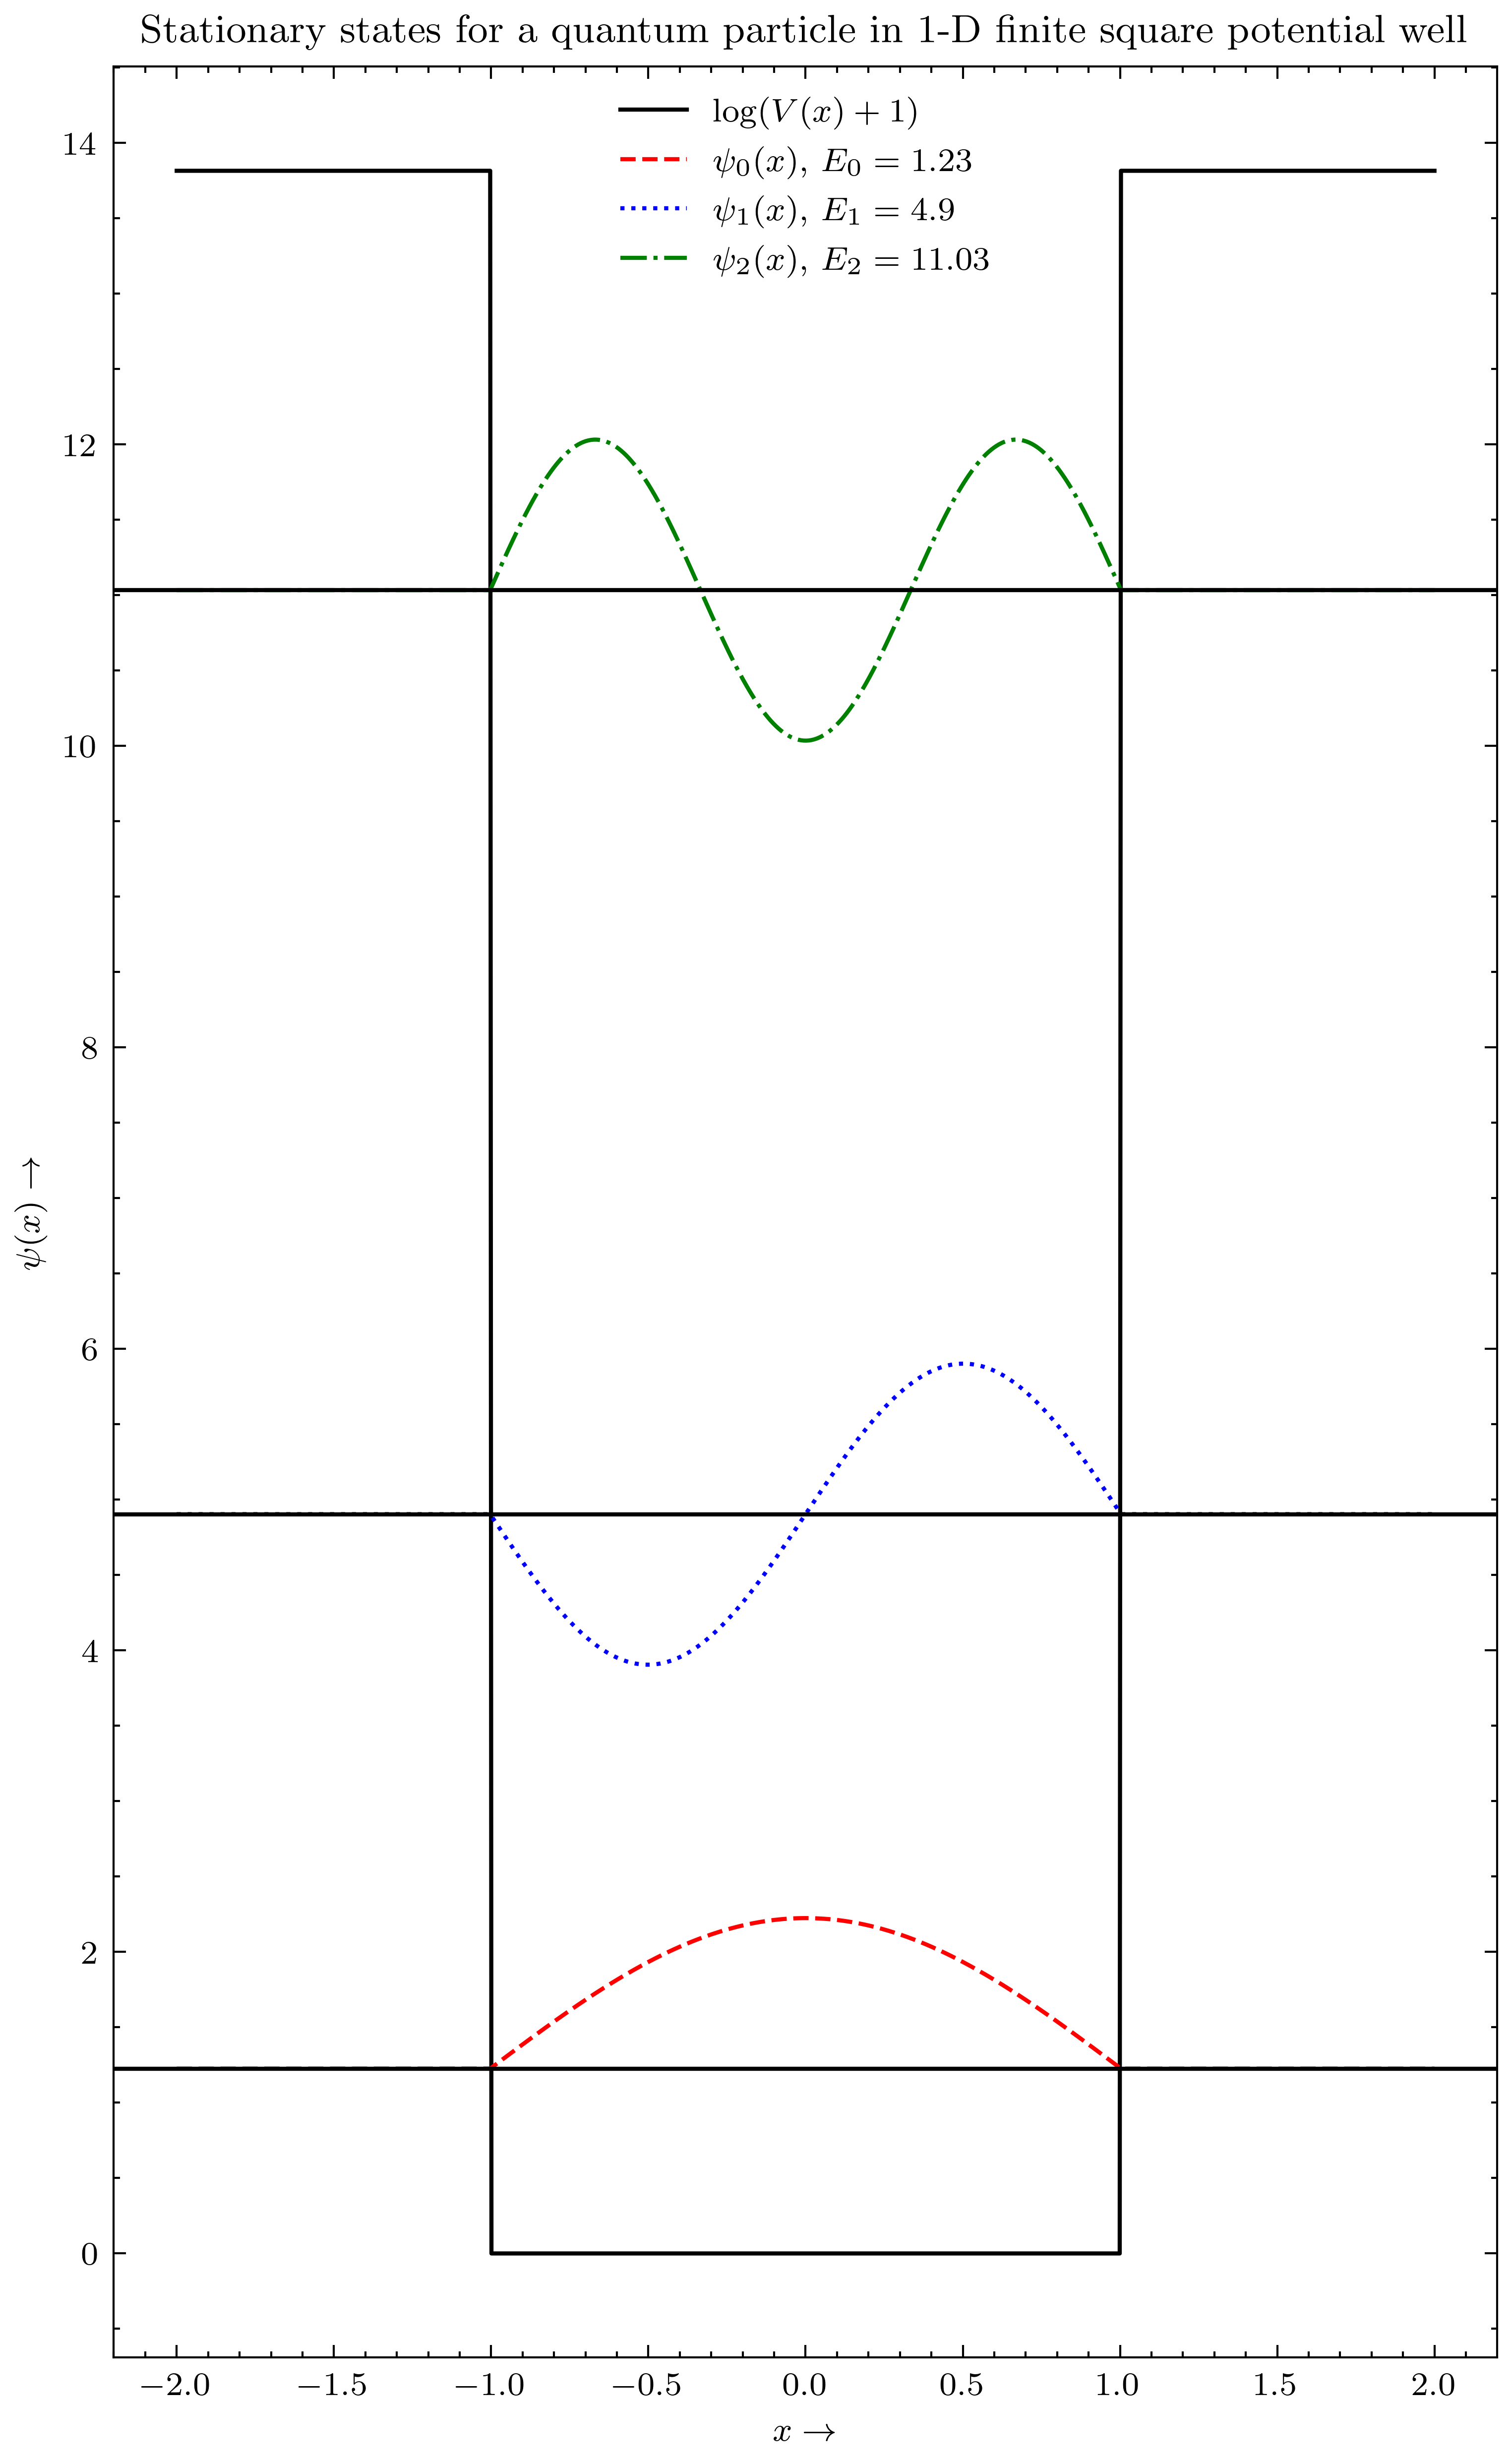

In [4]:
E_n = 3

plt.plot(x, np.log(V(x) + 1), label="$\log(V(x) + 1)$")

for i in range(E_n):
    plt.plot(x, E[i] + psi[i]/np.sqrt(integrate.simpson(psi[i]**2, x)), label=f"$\psi_{i}(x)$, $E_{i} = {round(E[i], 2)}$")
    plt.axhline(E[i])

plt.title("Stationary states for a quantum particle in 1-D finite square potential well")
plt.xlabel("$x \\rightarrow$")
plt.ylabel("$\psi(x) \\rightarrow$")
plt.legend()
plt.show()

# Finite square potential well

$$V(x)
=
\begin{cases}
0, & -a < x < a\\
V_0, & \text{otherwise}
\end{cases}
$$

In [5]:
a = 1
V_0 = 10

@np.vectorize
def V(x):
    if -a < x < a:
        return 0.0
    else:
        return V_0

xi, xf = -2, 2

x, E, psi = solve_sch_eqn(V, xi, xf)

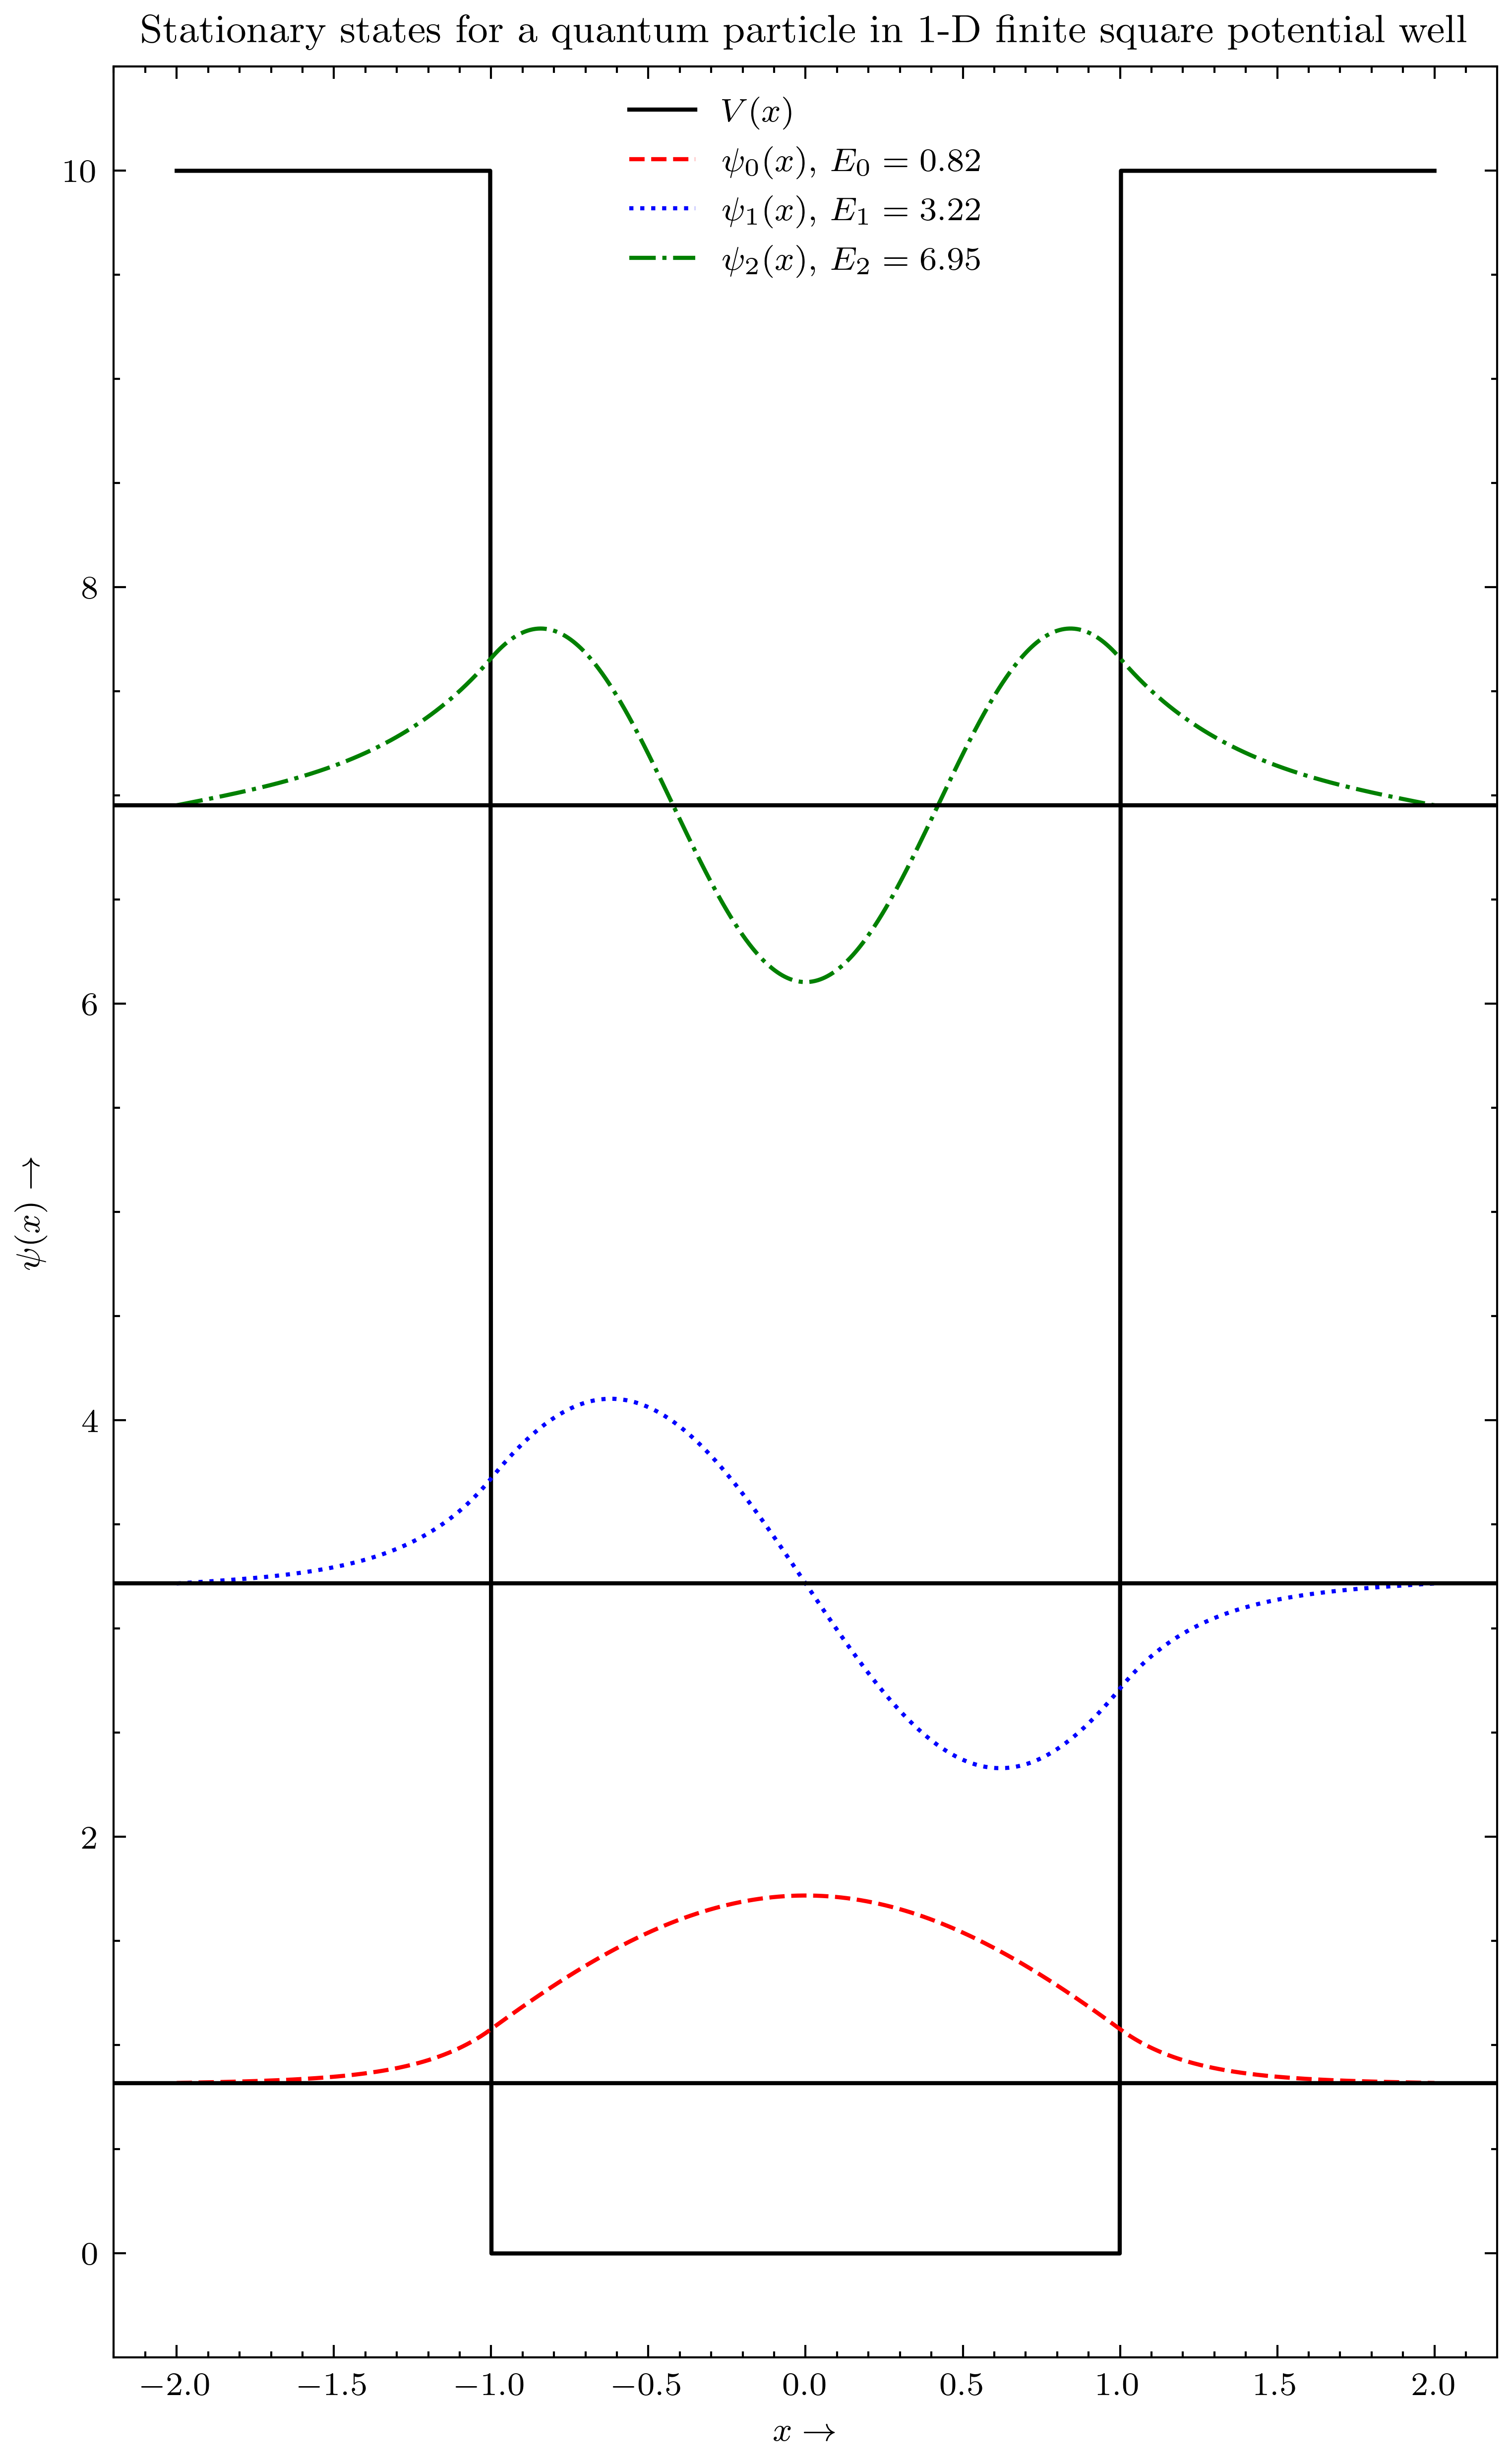

In [6]:
E_n = 3

plt.plot(x, V(x), label="$V(x)$")

for i in range(E_n):
    plt.plot(x, E[i] + psi[i]/np.sqrt(integrate.simpson(psi[i]**2, x)), label=f"$\psi_{i}(x)$, $E_{i} = {round(E[i], 2)}$")
    plt.axhline(E[i])

plt.title("Stationary states for a quantum particle in 1-D finite square potential well")
plt.xlabel("$x \\rightarrow$")
plt.ylabel("$\psi(x) \\rightarrow$")
plt.legend()
plt.show()

# Step potential

$$V(x)
=
\begin{cases}
0, & x \lt 0\\
V_0, & x \ge 0
\end{cases}
$$

In [7]:
a = 1
V_0 = 10

@np.vectorize
def V(x):
    if x < 0:
        return 0.0
    else:
        return V_0

xi, xf = -2, 2

x, E, psi = solve_sch_eqn(V, xi, xf)

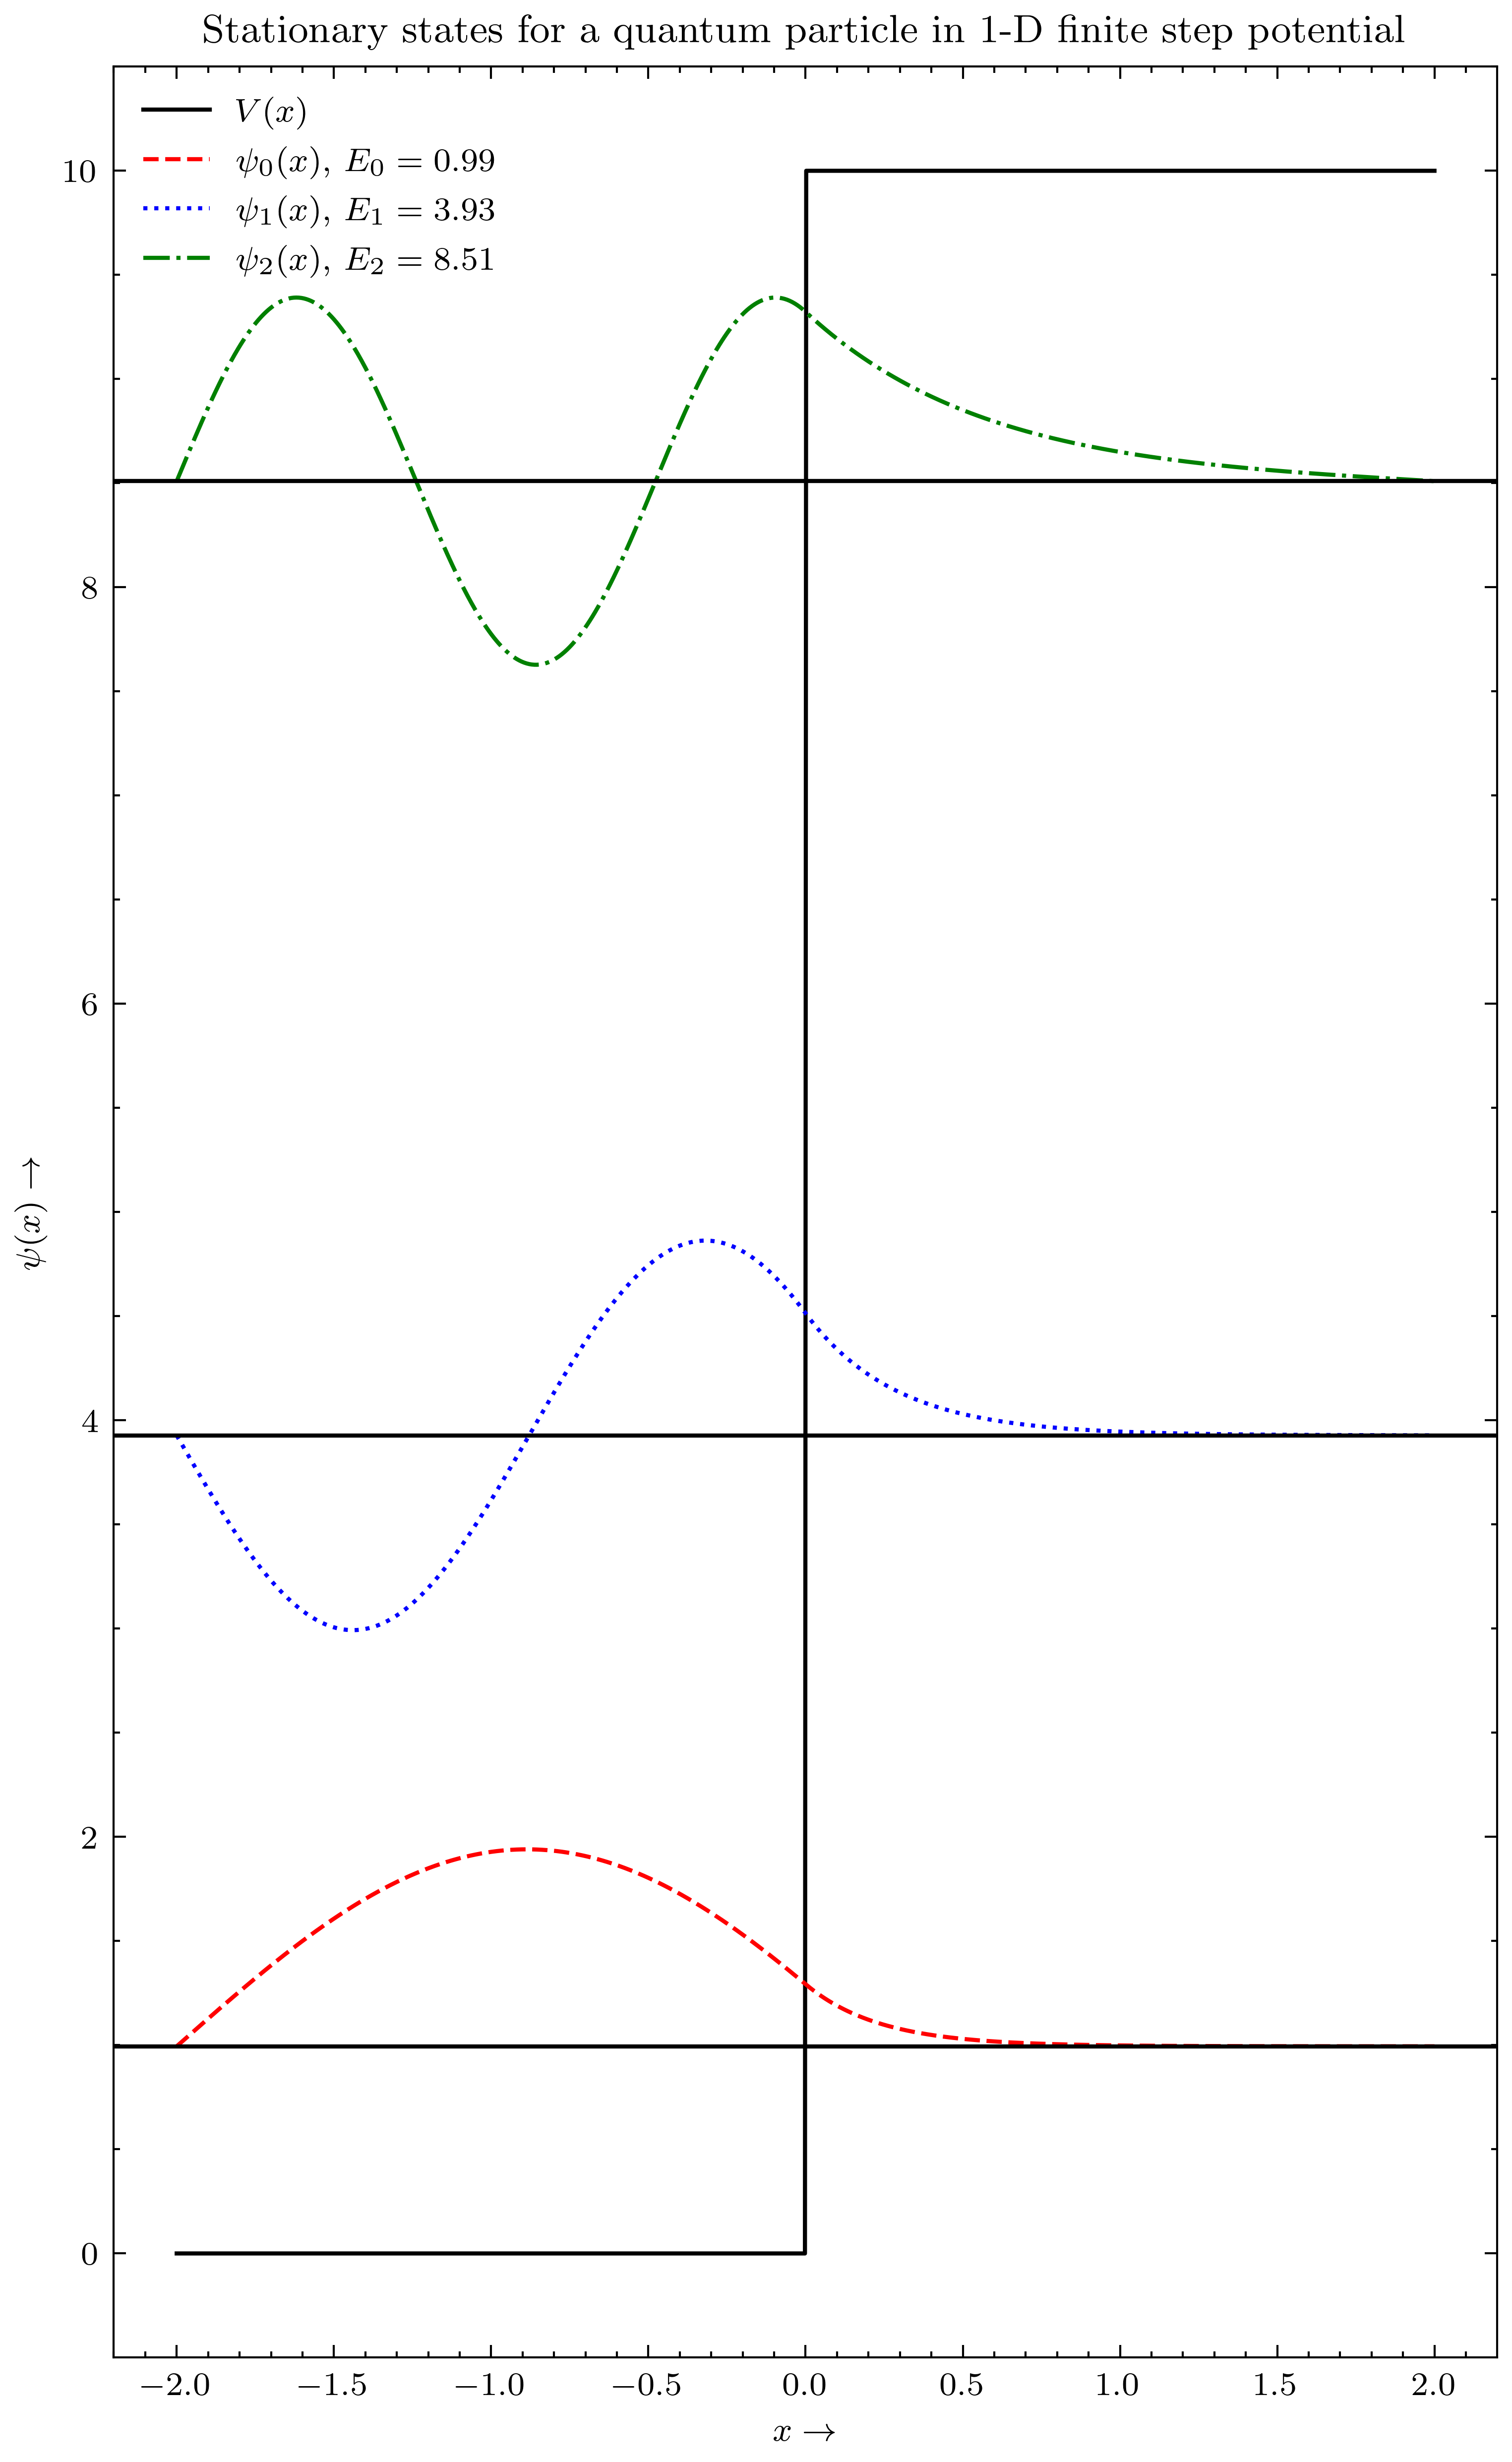

In [8]:
E_n = 3

plt.plot(x, V(x), label="$V(x)$")

for i in range(E_n):
    plt.plot(x, E[i] + psi[i]/np.sqrt(integrate.simpson(psi[i]**2, x)), label=f"$\psi_{i}(x)$, $E_{i} = {round(E[i], 2)}$")
    plt.axhline(E[i])

plt.title("Stationary states for a quantum particle in 1-D finite step potential")
plt.xlabel("$x \\rightarrow$")
plt.ylabel("$\psi(x) \\rightarrow$")
plt.legend()
plt.show()

# Linear Harmonic Oscillator

$$V(x)=\frac{1}{2} m \omega^2 x^2$$

In [9]:
def V(x):
    w = 1.5 # angular frequency
    
    return 0.5 * m * w**2 * x**2

xi, xf, yi, yf = -3, 3, 0, 0

x, E, psi = solve_sch_eqn(V, xi, xf)

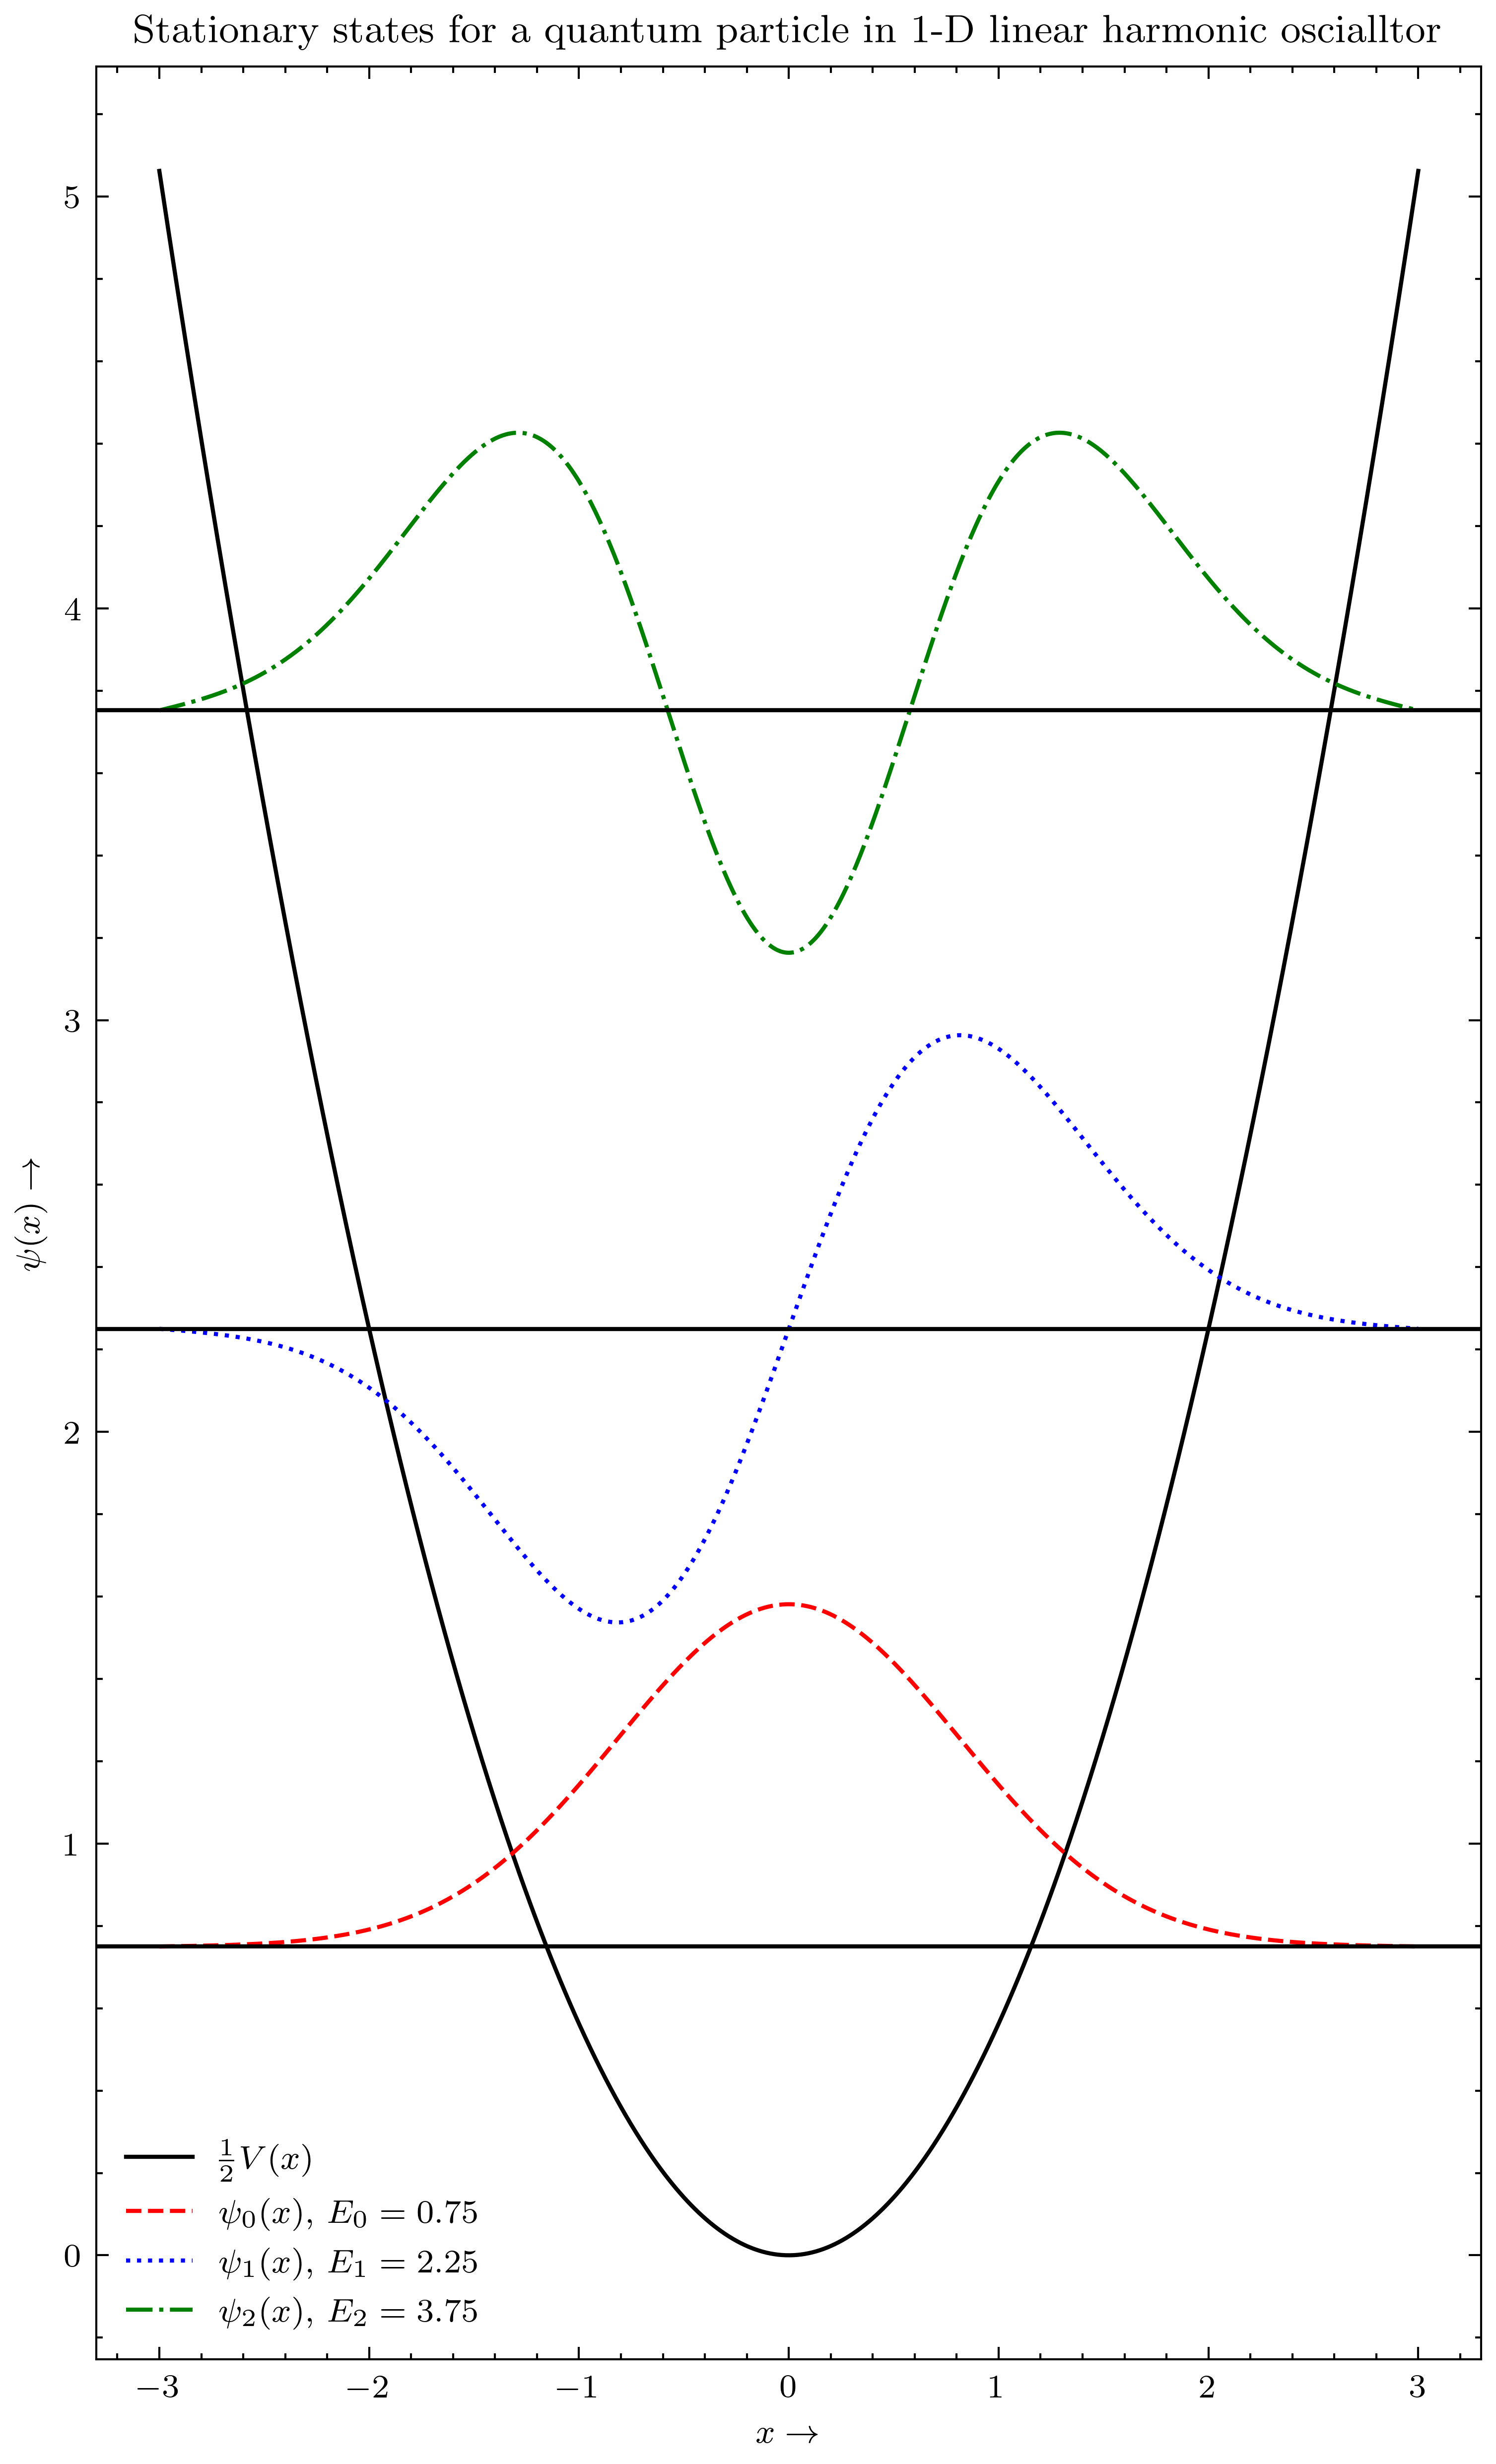

In [10]:
E_n = 3

plt.plot(x, 0.5*V(x), label="$\\frac{1}{2} V(x)$")

for i in range(E_n):
    plt.plot(x, E[i] + psi[i]/np.sqrt(integrate.simpson(psi[i]**2, x)), label=f"$\psi_{i}(x)$, $E_{i} = {round(E[i], 2)}$")
    plt.axhline(E[i])

plt.title("Stationary states for a quantum particle in 1-D linear harmonic oscialltor")
plt.xlabel("$x \\rightarrow$")
plt.ylabel("$\psi(x) \\rightarrow$")
plt.legend()
plt.show()

# Periodic square potential

$$V(x)
=
\begin{cases}
0, & -a \le x < 0\\
V_0, & 0 \le x \le a\\
\end{cases}
$$

$$
V(x) = V(x + 2a)
$$

In [11]:
a = 0.5
V_0 = 10.0

@np.vectorize
def V(x):
    if -a <= x < 0.0:
        return 0.0
    elif 0.0 <= x <= a:
        return V_0
    else:
        return V(x + 2*a) if x <= a else V(x - 2*a)

xi, xf = -2, 2

x, E, psi = solve_sch_eqn(V, xi, xf)

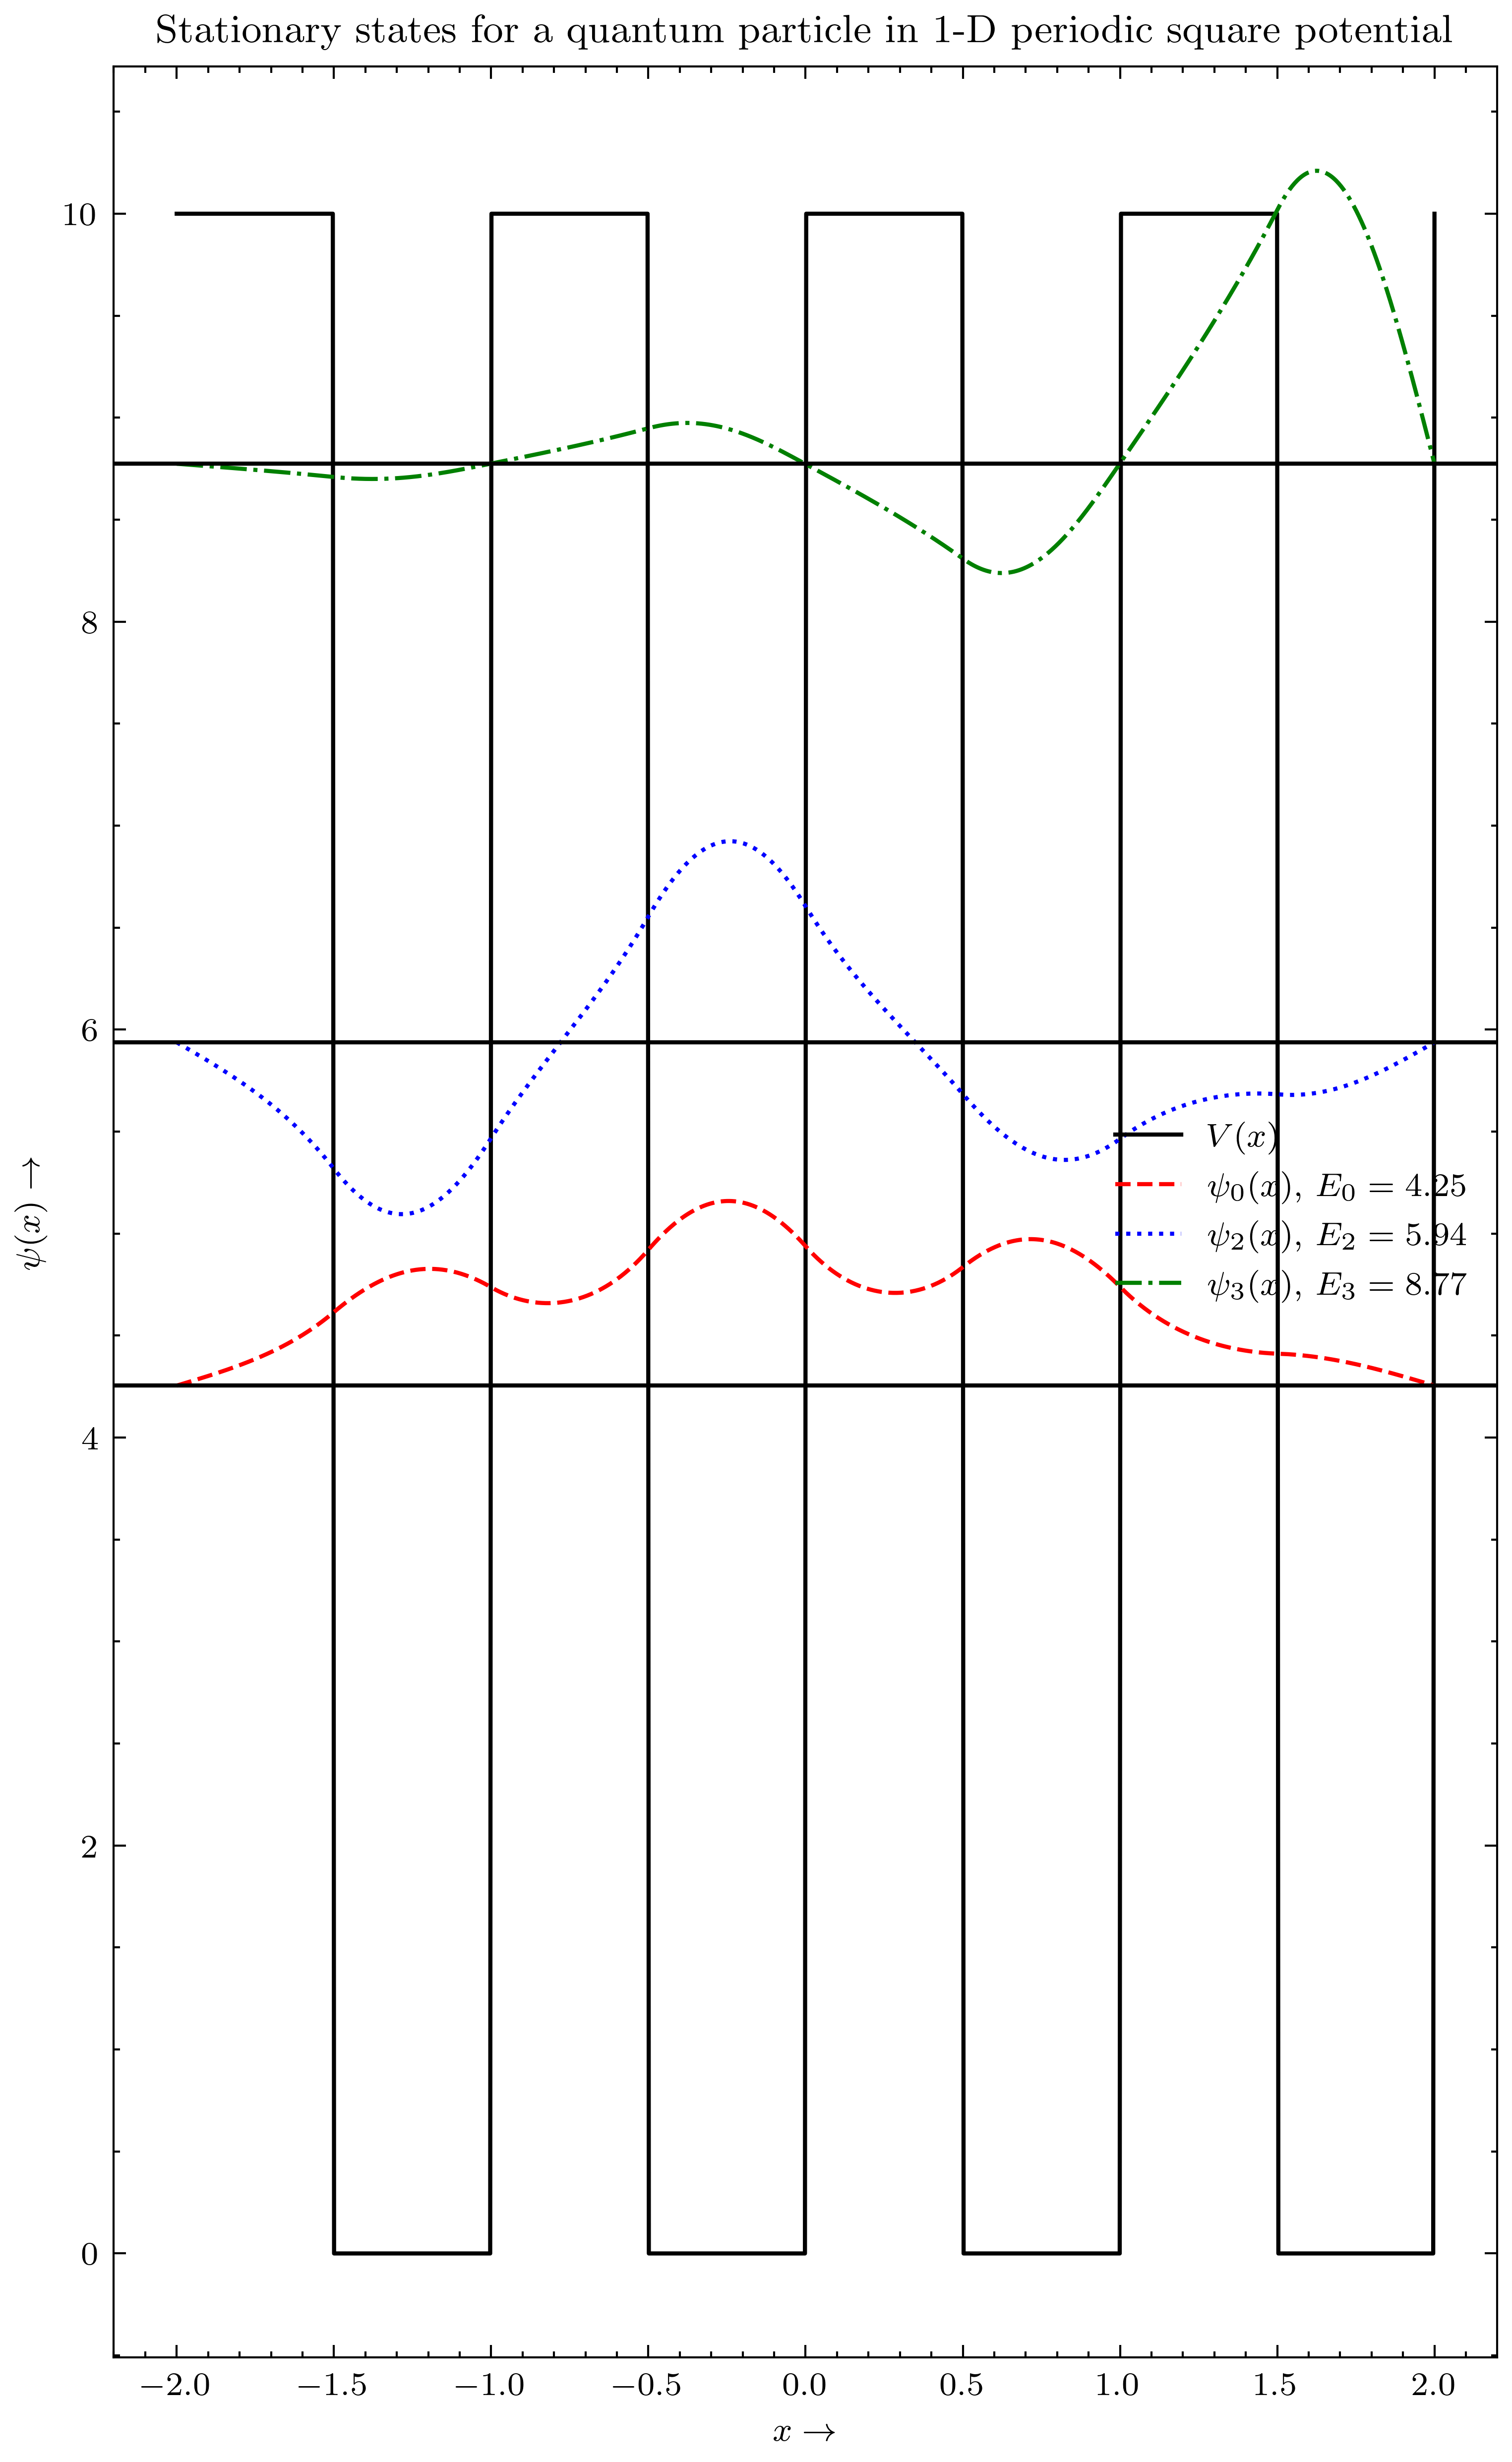

In [12]:
E_n = 0, 2, 3

plt.plot(x, V(x), label="$V(x)$")

for i in E_n:
    plt.plot(x, E[i] + psi[i]/np.sqrt(integrate.simpson(psi[i]**2, x)), label=f"$\psi_{i}(x)$, $E_{i} = {round(E[i], 2)}$")
    plt.axhline(E[i])

plt.title("Stationary states for a quantum particle in 1-D periodic square potential")
plt.xlabel("$x \\rightarrow$")
plt.ylabel("$\psi(x) \\rightarrow$")
plt.legend()
plt.show()

# Barier Potential

$$
V(x)
=
\begin{cases}
V_0, & 0 < x \le a\\
0, & \text{otherwise}
\end{cases}
$$

In [13]:
a = 0.1
V_0 = 100.0

@np.vectorize
def V(x):
    if 0 < x <= a:
        return V_0
    else:
        return 0.0

xi, xf, yi, yf = -1, 1, 0, 0

x, E, psi = solve_sch_eqn(V, xi, xf)

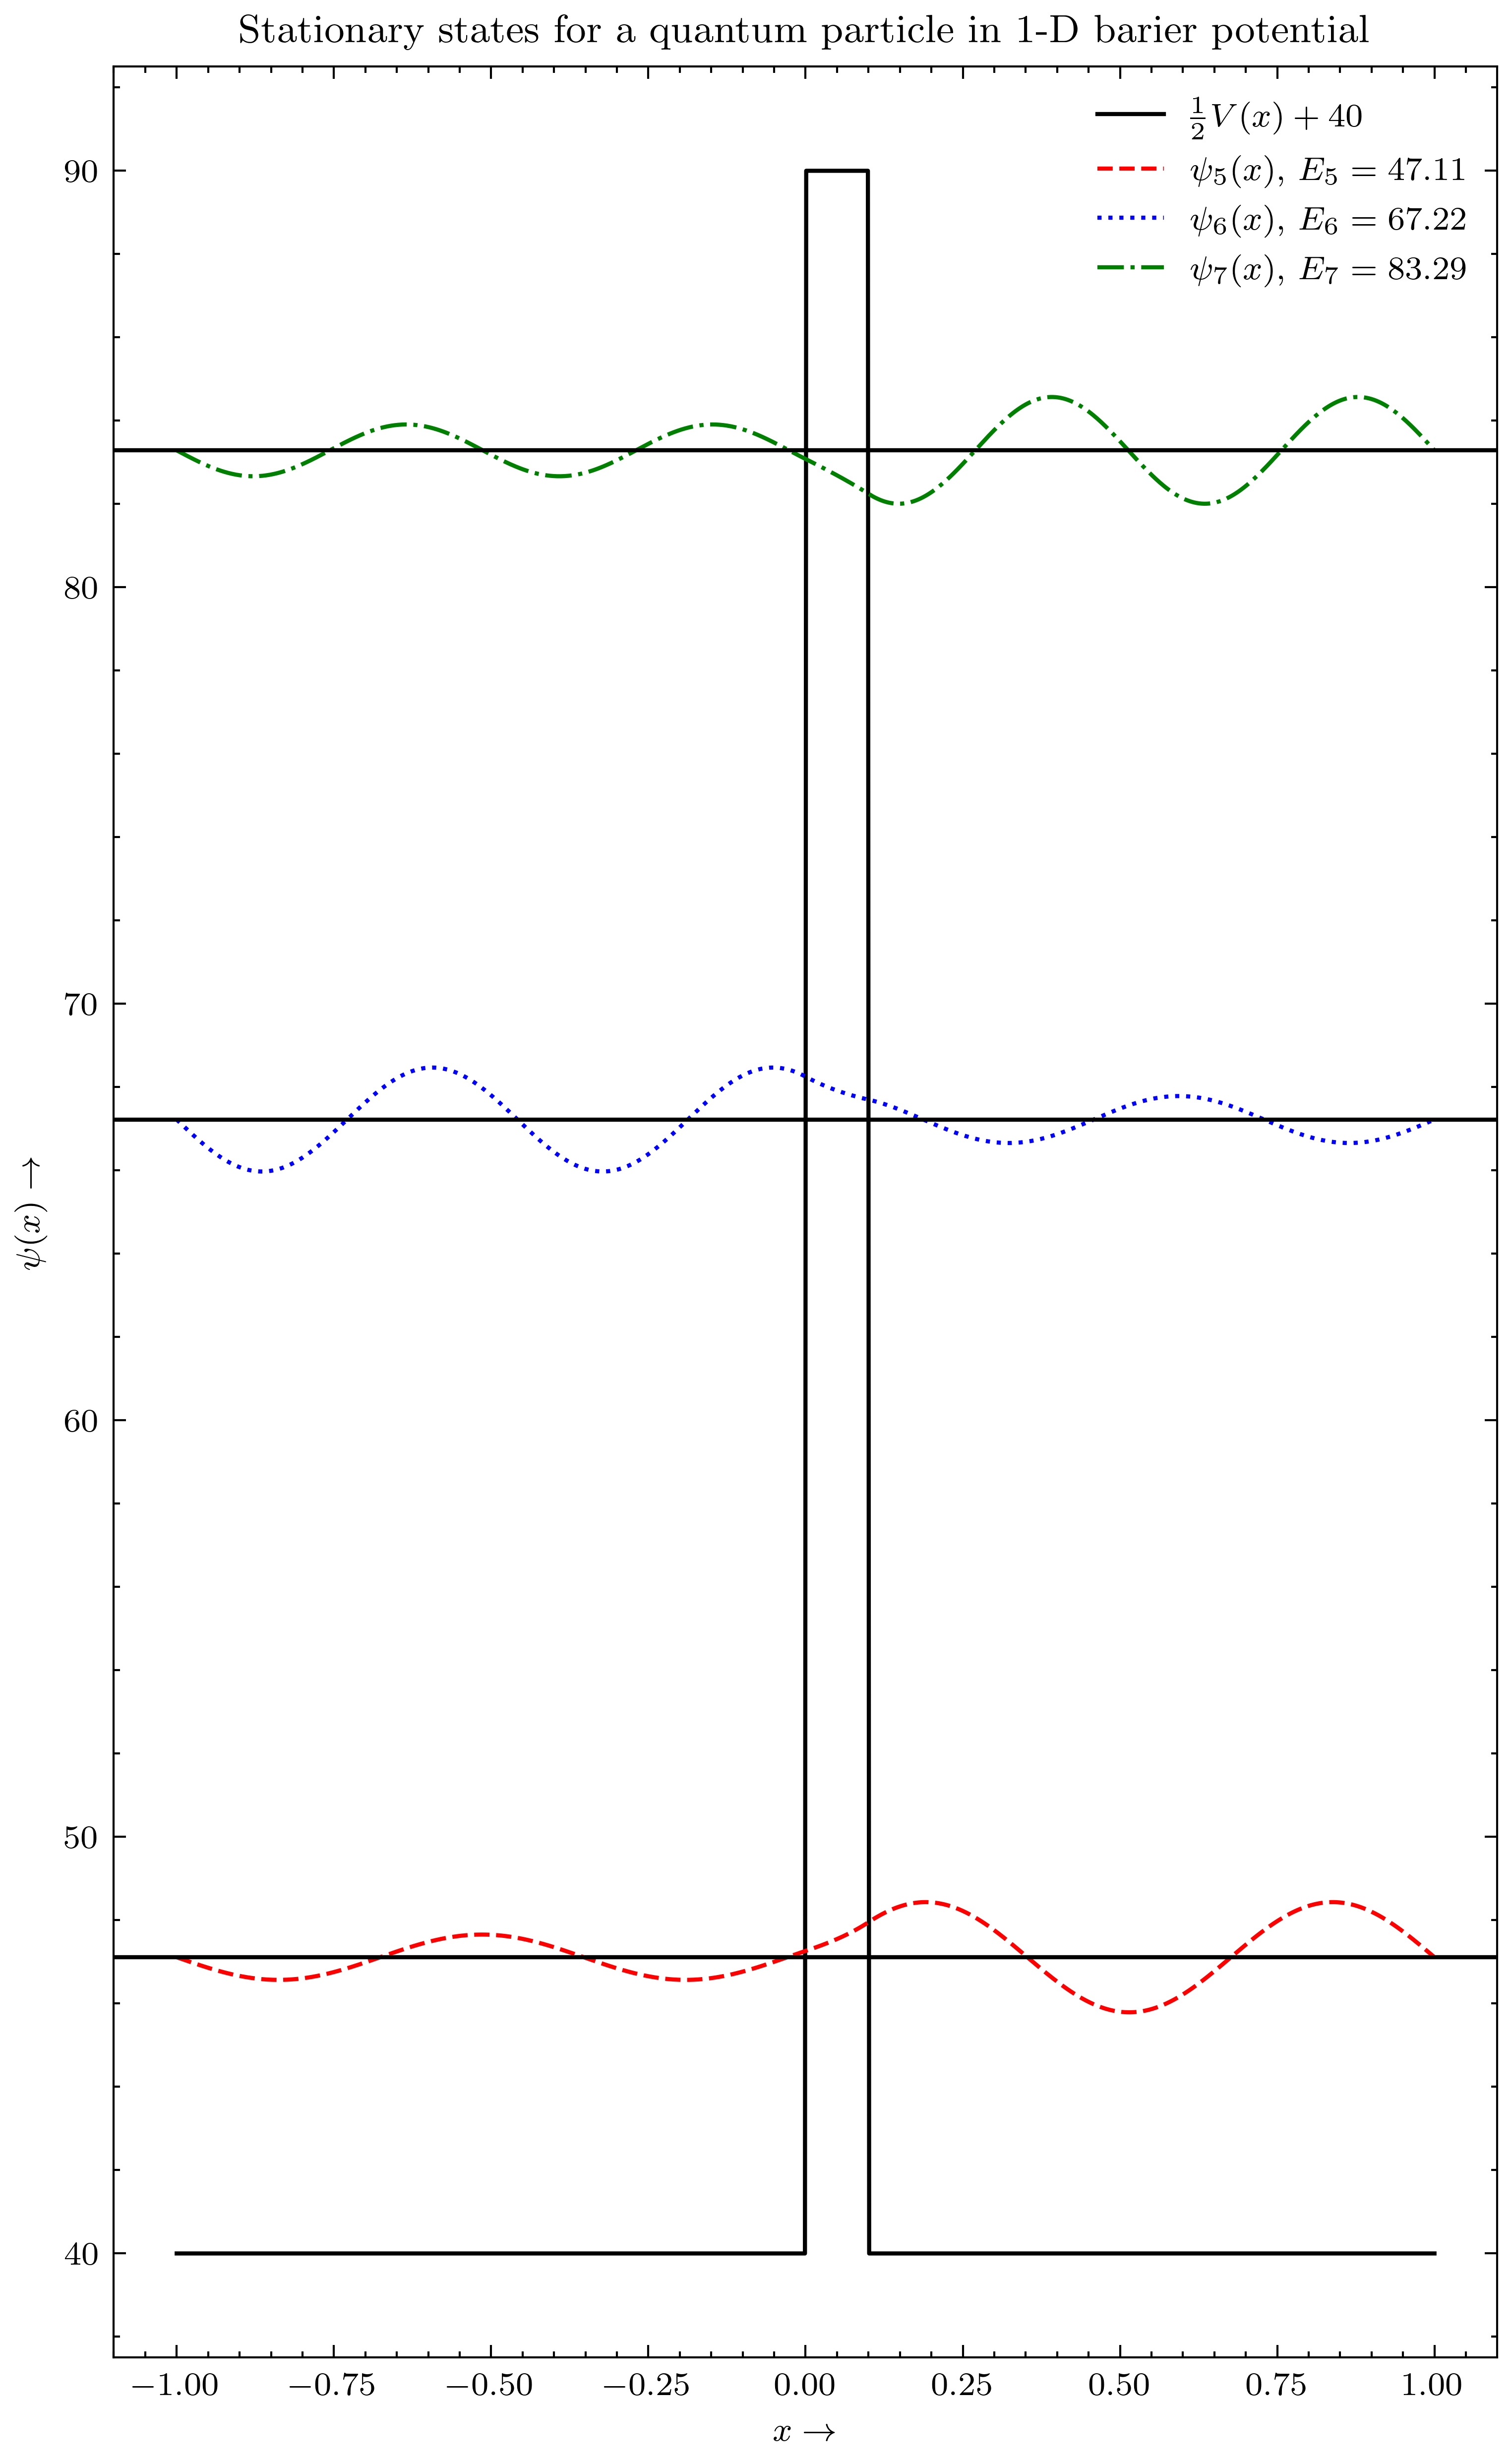

In [14]:
E_n = 5, 6, 7

plt.plot(x, 0.5 * V(x) + 40, label="$\\frac{1}{2}V(x) + 40$")

for i in E_n:
    plt.plot(x, E[i] + psi[i]/np.sqrt(integrate.simpson(psi[i]**2, x)), label=f"$\psi_{i}(x)$, $E_{i} = {round(E[i], 2)}$")
    plt.axhline(E[i])

plt.title("Stationary states for a quantum particle in 1-D barier potential")
plt.xlabel("$x \\rightarrow$")
plt.ylabel("$\psi(x) \\rightarrow$")
plt.legend()
plt.show()